## Modules

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from tqdm import tqdm

import requests
import pandas as pd
from pandas import Series, DataFrame

from IPython.core.display import Image, display

# own API handler
from api_wrapper import get_df_from_query
from api_wrapper import get_visits_df

## Styling

In [2]:
# Charts styling
plt.style.use('fivethirtyeight')
#plt.style.use('bmh')
#plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8 # increases figure size
matplotlib.rcParams.update({'font.size': 14}) # increases chart font size
rcParams['font.family'] = 'Arial Narrow'

# style to enhance df viz, from https://github.com/brandon-rhodes/pycon-pandas-tutorial
from IPython.core.display import HTML
css = open('style-table.css').read() #+ open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
# Sets input parameters 
DAYS_AGO = 365 # days to look back in visits history
ITEMS_TO_QUERY = 200 # number of itens requested per query (max. permitted by ML is 200)
TOTAL_ITEMS_TO_QUERY = 2000 # max. number of results to be downloaded ("None" to make it limitless)
ITEMS_TO_PLOT = 10 # list of "ITEMS_TO_PLOT" top sold items; e.g. if 10, visits from top 10 sold itens will be plotted

In [4]:
# Search inputs
_query = 'fonte'
_category = 'MLB5940'

In [5]:
df = get_df_from_query(query=_query, category=_category, items_per_query=ITEMS_TO_QUERY, total_results_limit=TOTAL_ITEMS_TO_QUERY)

Searching for "fonte" in Acessórios de PC...


100%|██████████| 2000/2000 [00:14<00:00, 109.19it/s]


Initial request sent to API: https://api.mercadolibre.com/sites/MLB/search?offset=0&category=MLB5940&q=fonte&limit=1


In [6]:
if (_query == '' or _query == None) and (_category == '' or _category == None):
    print('Please provide either a query or category to be searched.')
else:
    pass

if _query == '' or _query == None:
    query_name = 'N/A'
else:
    query_name = _query

if (_category == '') or (_category == None):
    category_name = 'N/A'
else:
    # Gets category name
    url = 'https://api.mercadolibre.com/categories/' + _category
    data = requests.get(url).json()
    category_name = data['name']

In [7]:
df.sort_values('revenue').head()

,title,price,sold_quantity,available_quantity,permalink,thumbnail,seller_address,seller,stop_time,revenue,start_time,days_ago,city,state,seller_id
id,,,,,,,,,,,,,,,
MLB674633176,Fonte Para Scanner Hp G3110 - L2698a / L2698ar,38.37,0,5,http://produto.mercadolivre.com.br/MLB-6746331...,http://mlb-s1-p.mlstatic.com/235211-MLB2050732...,"{'city': {'name': 'São Paulo', 'id': 'BR-SP-44...","{'power_seller_status': None, 'car_dealer': Fa...",2036-02-27 00:45:50,0.0,2016-02-27 00:45:50,260,São Paulo,São Paulo,37970286
MLB780817313,Fonte Chaveada Colmeia 24v 2a 50w,77.55,0,9999,http://produto.mercadolivre.com.br/MLB-7808173...,http://mlb-s2-p.mlstatic.com/277521-MLB2082356...,"{'city': {'name': 'Tapira', 'id': 'TUxCQ1RBUDh...","{'power_seller_status': None, 'car_dealer': Fa...",2036-07-14 12:35:16,0.0,2016-07-14 12:35:16,122,Tapira,Paraná,97268948
MLB780817312,Fonte Chaveada Colmeia 12v 50a,226.73,0,9999,http://produto.mercadolivre.com.br/MLB-7808173...,http://mlb-s1-p.mlstatic.com/258521-MLB2082355...,"{'city': {'name': 'Tapira', 'id': 'TUxCQ1RBUDh...","{'power_seller_status': None, 'car_dealer': Fa...",2036-07-14 12:35:14,0.0,2016-07-14 12:35:14,122,Tapira,Paraná,97268948
MLB780817307,Fonte Chaveada Colmeia 12v 20a,100.24,0,9999,http://produto.mercadolivre.com.br/MLB-7808173...,http://mlb-s2-p.mlstatic.com/257621-MLB2082355...,"{'city': {'name': 'Tapira', 'id': 'TUxCQ1RBUDh...","{'power_seller_status': None, 'car_dealer': Fa...",2036-07-14 12:35:11,0.0,2016-07-14 12:35:11,122,Tapira,Paraná,97268948
MLB780817303,Fonte Chaveada Colmeia 12v 12a 145w,146.69,0,9999,http://produto.mercadolivre.com.br/MLB-7808173...,http://mlb-s2-p.mlstatic.com/650621-MLB2082356...,"{'city': {'name': 'Tapira', 'id': 'TUxCQ1RBUDh...","{'power_seller_status': None, 'car_dealer': Fa...",2036-07-14 12:35:08,0.0,2016-07-14 12:35:08,122,Tapira,Paraná,97268948


In [8]:
ds = df.describe()
ds

,price,sold_quantity,available_quantity,revenue,days_ago,seller_id
count,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1.443000e+03
mean,88.193791,15.322245,933.532918,383.398392,203.825364,1.070586e+08
std,182.777182,128.255350,5797.243660,2264.024572,148.055187,6.376239e+07
min,0.530000,0.000000,1.000000,0.000000,5.000000,1.242010e+05
25%,12.900000,0.000000,1.000000,0.000000,78.000000,5.027155e+07
50%,32.350000,0.000000,5.000000,0.000000,161.000000,9.726895e+07
75%,81.990000,1.000000,28.000000,42.900000,351.000000,1.609724e+08
max,2494.000000,3900.000000,99999.000000,39392.120000,489.000000,2.317957e+08


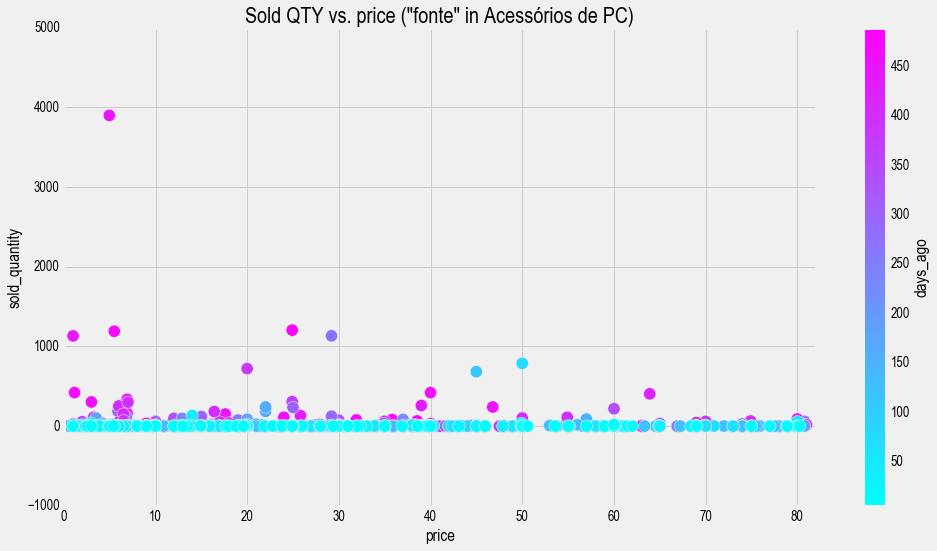

In [9]:
_xlim=(0, ds.loc['75%', 'price'])

df.plot.scatter('price', 'sold_quantity', c='days_ago', cmap='cool', xlim=_xlim, s=150)
plt.title('Sold QTY vs. price ("' + query_name + '"' + ' in ' + category_name + ')', fontsize=22)

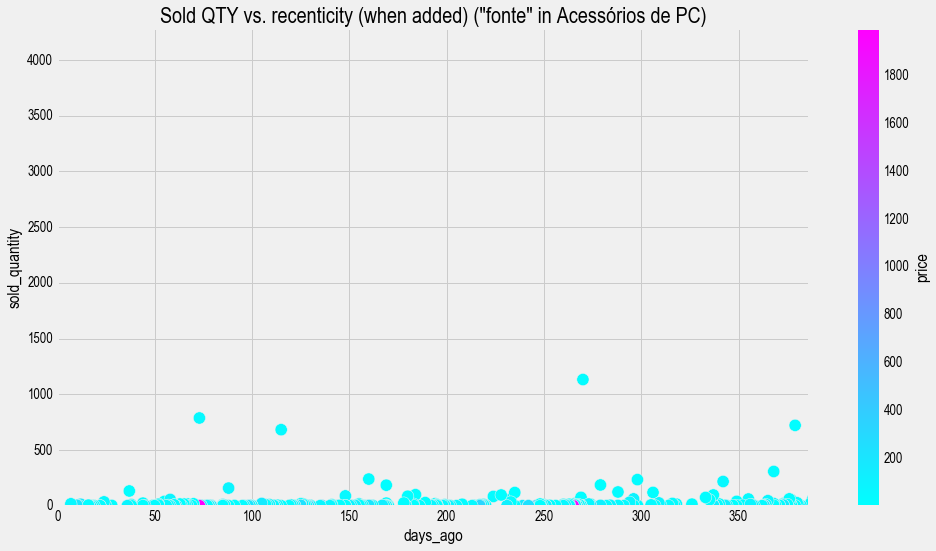

In [10]:
_ymin = ds.loc['25%', 'sold_quantity']

a = df[(df.sold_quantity > _ymin)]

_xlim = (0, ds.loc['75%', 'days_ago']*1.1)
_ylim = (0, ds.loc['max', 'sold_quantity']*1.1)

a.plot.scatter('days_ago', 'sold_quantity', c='price', cmap='cool', xlim=_xlim, ylim=_ylim, s=150)
plt.title('Sold QTY vs. recenticity (when added) ("' + query_name + '"' + ' in ' + category_name + ')', fontsize=22)

In [11]:
visits = get_visits_df(df, 20)

In [12]:
visits.head()

,MLB692368889,MLB684522330,MLB782653912,MLB683829064,MLB707301609,MLB696552517,MLB692372796,MLB701087015,MLB706993823,MLB728982122,MLB699067097,MLB687497961,MLB701771457,MLB688034246,MLB723200605,MLB692010560,MLB688032293,MLB713105021,MLB738029222,MLB736739684
date,,,,,,,,,,,,,,,,,,,,
2015-11-14 04:00:00,33,2,13,29,20,20,37,5,28,0,1,0,17,1,0,2,0,2,0,0
2015-11-15 04:00:00,50,1,9,55,23,30,23,10,10,0,0,0,11,6,0,0,8,5,0,0
2015-11-16 04:00:00,60,0,20,56,23,47,48,13,38,0,3,0,17,10,13,3,5,7,0,0
2015-11-17 04:00:00,67,0,16,67,25,39,43,13,34,0,11,0,16,1,0,3,12,5,0,0
2015-11-18 04:00:00,83,0,12,66,31,41,48,20,39,0,2,2,11,7,2,3,10,7,0,0
